In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [47]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [48]:
sales_c= df.drop(['Product Name','Product Category','Month','Year'],axis=1)

In [49]:
sales_c.shape

(60, 1)

In [50]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [51]:
sales_c['Sales'].sum()

45599092

Text(0.5, 1.0, 'Product C')

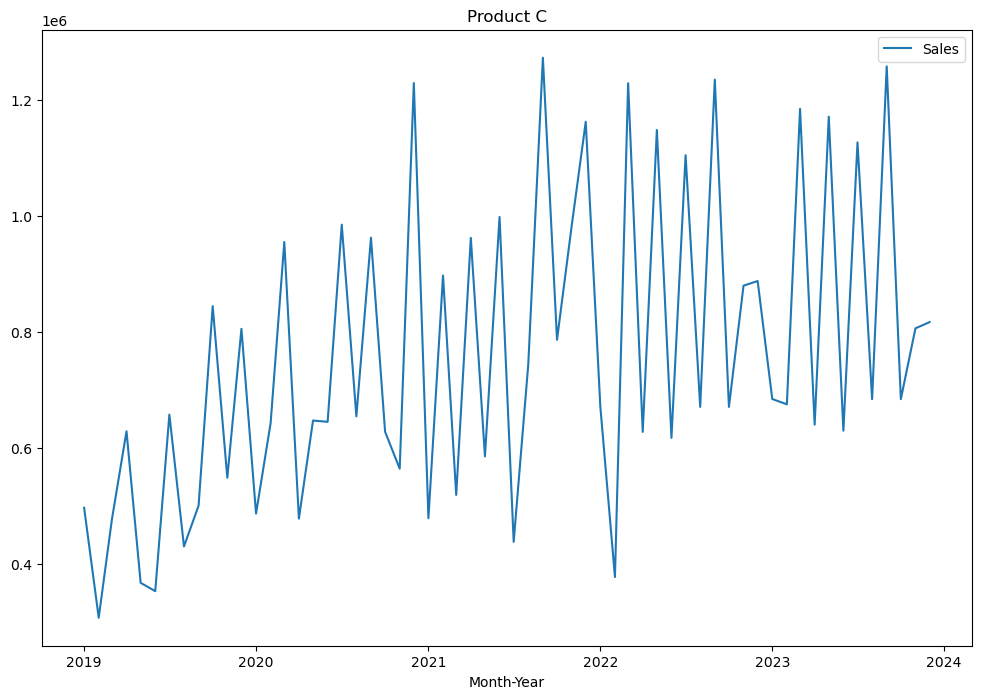

In [52]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c)
plt.title('Product C')

In [53]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [54]:
adf_test(sales_c)

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


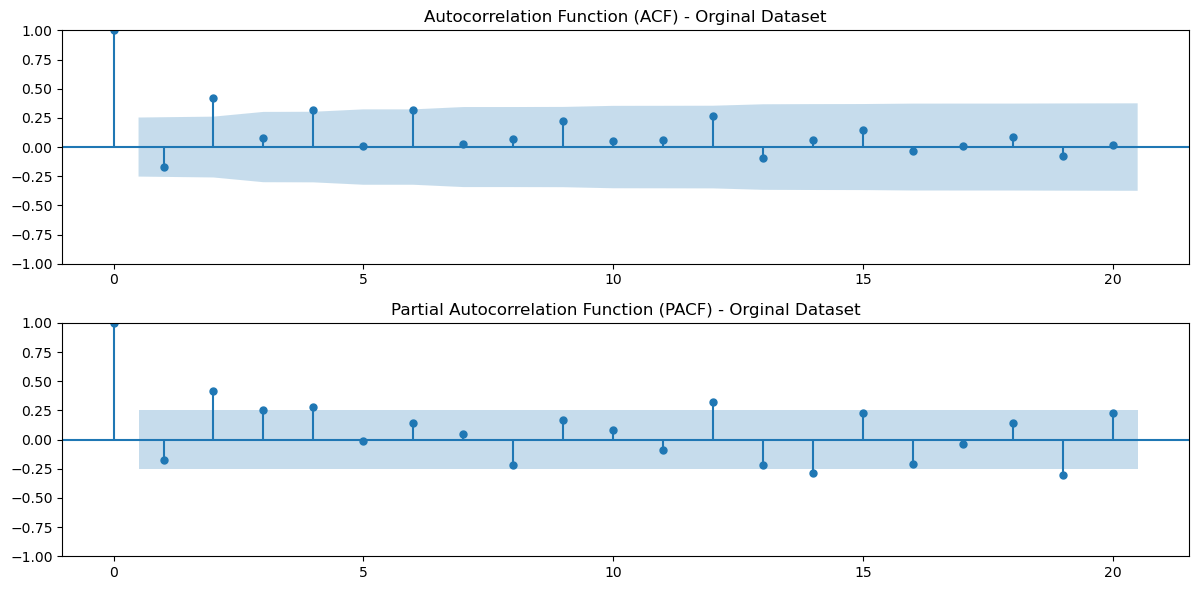

In [55]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [31]:
#train= sales_c[:48]
#test=sales_c[48:]

In [32]:
#len(train)

In [13]:
#combination p=(0,1,2,3,4,5) d=0 q=(0,1,2) must be tested with accuracy metrics and aic

In [14]:
param = [(0,0,0),(0,0,1),(0,0,2),(1,0,0),(1,0,1),(1,0,2),(2,0,0), (2,0,1), (2,0,2),(3,0,0),(3,0,1),(3,0,2),(4,0,0),(4,0,1),(4,0,2),(5,0,0),(5,0,1),(5,0,2)]

for p in param:  # Changed 'x' to 'p'
    model = ARIMA(train, order=p).fit()
    pred = model.forecast(steps=len(test))
    mae = mean_absolute_error(test, pred)
    # Calculate MAPE manually
    mape = np.mean(np.abs((test - pred) / test)) * 100
    mse=mean_squared_error(test, pred)
    rmse = np.sqrt(mean_squared_error(test, pred))
    print(p)
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('A.I.C:', model.aic)

(0, 0, 0)
MAE: 197494.91666666666
MSE: 72329463613.26427
RMSE: 268941.3757926888
A.I.C: 1477.3647356860931
(0, 0, 1)
MAE: 196530.7772357098
MSE: 72244367508.35347
RMSE: 268783.1235556903
A.I.C: 1340.2417644357163
(0, 0, 2)
MAE: 199418.14196632963
MSE: 72910586045.15675
RMSE: 270019.6030756966
A.I.C: 1335.4699977208952
(1, 0, 0)
MAE: 196136.0568215677
MSE: 72247716738.95686
RMSE: 268789.35384229204
A.I.C: 1339.813398800784
(1, 0, 1)
MAE: 195117.8937544798
MSE: 70805822965.90527
RMSE: 266093.635711013
A.I.C: 1339.9013342416943
(1, 0, 2)
MAE: 208871.83408917123
MSE: 56584661103.67733
RMSE: 237875.30578787983
A.I.C: 1328.7635143320151
(2, 0, 0)
MAE: 206692.22770461833
MSE: 72811098076.55904
RMSE: 269835.31658505904
A.I.C: 1335.166005451524
(2, 0, 1)
MAE: 207458.30743956834
MSE: 56559246024.13094
RMSE: 237821.87877512645
A.I.C: 1328.5984487489134
(2, 0, 2)
MAE: 207501.58624607467
MSE: 56353287034.44583
RMSE: 237388.47283397277
A.I.C: 1329.7434646384297
(3, 0, 0)
MAE: 204405.196696718
MSE: 6

In [56]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
        model = ARIMA(sales_c, order=(p,0,q)).fit() 
        # Add order and scores to list        
        order.append((p, q, model.aic, model.bic,))

#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic'])

In [57]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic
19  4  3  1651.383919  1670.233020
23  5  3  1653.241865  1674.185311
9   2  1  1654.502087  1664.973810
10  2  2  1655.978467  1668.544534
13  3  1  1656.289688  1668.855755
6   1  2  1656.723286  1667.195009
16  4  0  1656.912953  1669.479021
7   1  3  1657.231909  1669.797976
11  2  3  1657.244814  1671.905226
17  4  1  1657.497628  1672.158040
14  3  2  1658.113444  1672.773856
18  4  2  1658.803989  1675.558746
20  5  0  1658.826608  1673.487020
21  5  1  1659.177812  1675.932569
15  3  3  1659.200985  1675.955742
22  5  2  1660.633191  1679.482292
12  3  0  1660.689921  1671.161644
8   2  0  1663.357269  1671.734647
2   0  2  1664.185078  1672.562456
3   0  3  1665.550643  1676.022366
5   1  1  1670.017122  1678.394500
4   1  0  1672.225913  1678.508947
1   0  1  1673.294322  1679.577355
0   0  0  1858.747046  1862.935736


In [58]:
train= sales_c[:48]
test=sales_c[48:]

In [59]:
len(train)

48

In [60]:
model_arima= ARIMA (train, order=(4,0,3)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -655.012
Date:                Wed, 03 Apr 2024   AIC                           1328.024
Time:                        20:18:55   BIC                           1344.865
Sample:                    01-01-2019   HQIC                          1334.388
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.341e+05   1.86e+05      3.936      0.000    3.69e+05     1.1e+06
ar.L1         -0.7834      0.227     -3.448      0.001      -1.229      -0.338
ar.L2          0.0477      0.184      0.259      0.7

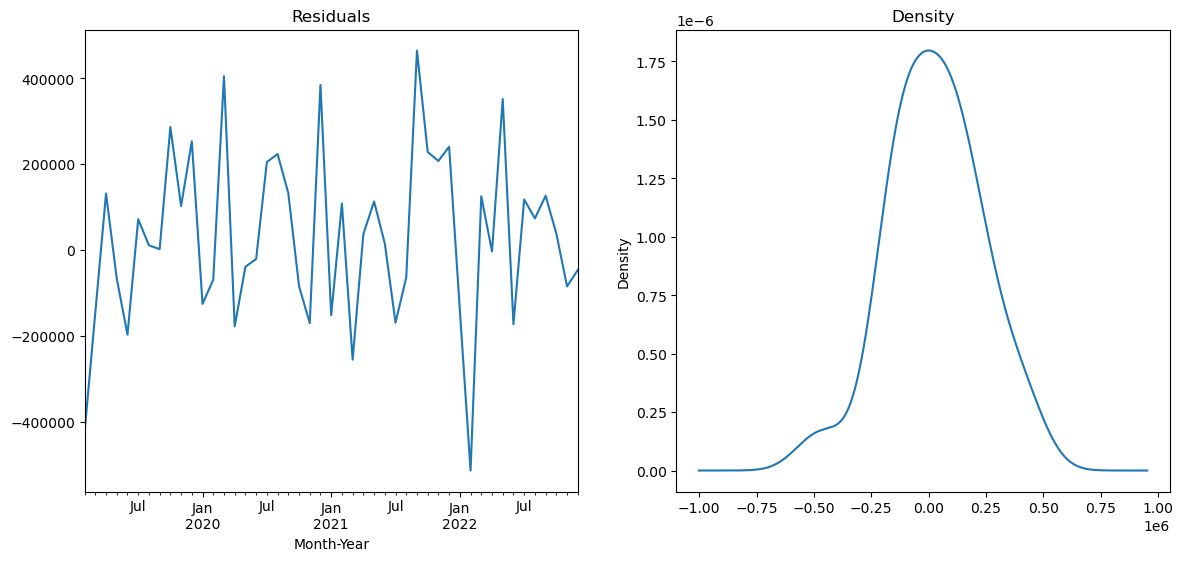

In [61]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

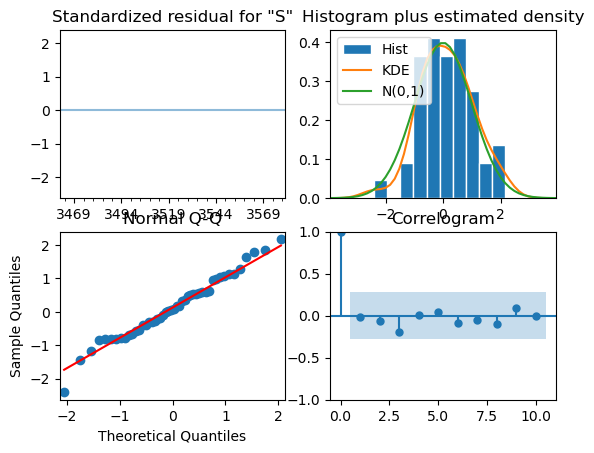

In [62]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics()
plt.show()


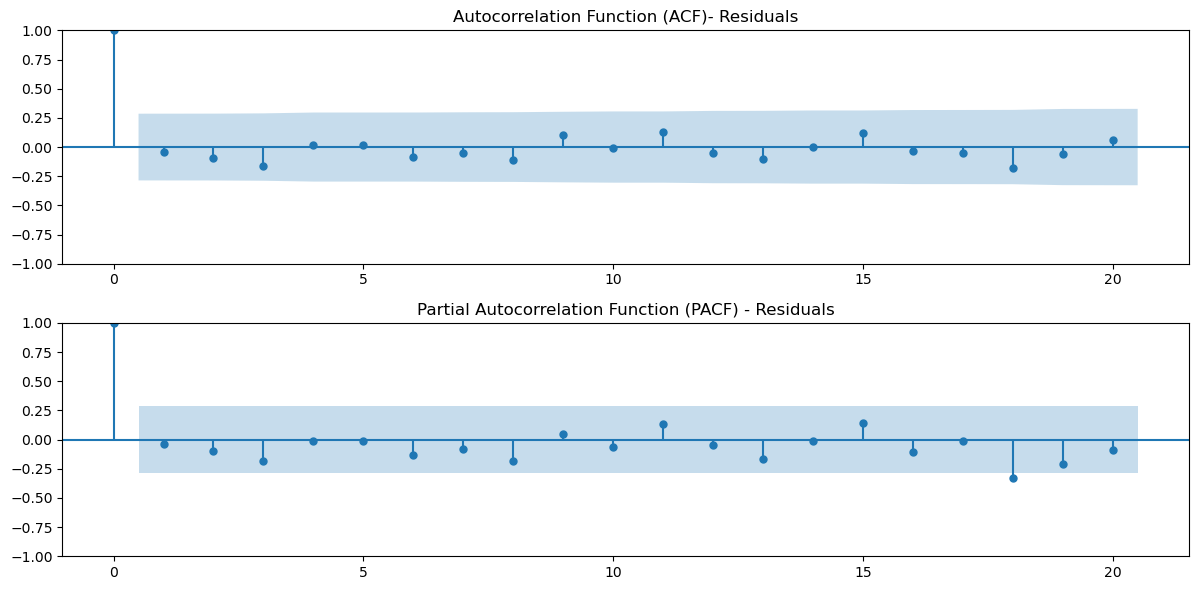

In [63]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

In [64]:
pred=model.forecast(steps= len(test))
sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_c.plot()

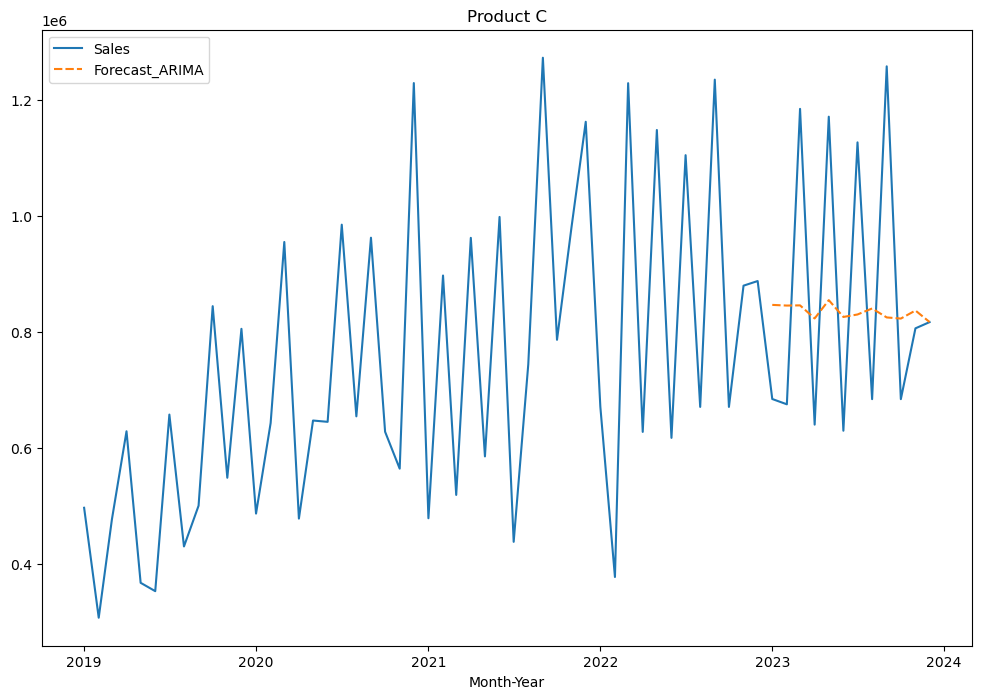

In [65]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMA']])
plt.title('Product C')
plt.show()

In [44]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 205211.53809326957
MAPE - ARIMA: 0.24077331718886666
MSE - ARIMA: 51357756526.641685
RMSE - ARIMA: 226622.49783867816


# AUTO-ARIMA

In [19]:
import pmdarima as pm

In [20]:
auto_arima= pm.auto_arima(train, stepwise=False, seasonal=True,m=12)
auto_arima

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [21]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -645.629
Date:                Mon, 01 Apr 2024   AIC                           1299.258
Time:                        15:28:19   BIC                           1306.659
Sample:                    01-01-2019   HQIC                          1302.043
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.03e+04   1.11e+04      2.729      0.006    8539.484    5.21e+04
ar.L1         -0.5673      0.150     -3.787      0.000      -0.861      -0.274
ma.L1         -0.7461      0.139     -5.383      0.000      -1.018      -0.474
sigma2       5.25e+10      0.006   8.38e+12      0.000    5.25e+10    5.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.80   Prob(JB):                         0.09
Heteroskedasticity (H):               2.61   Skew:                            -0.44
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+28. Standard errors may be unstable.
"""

In [22]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_c[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

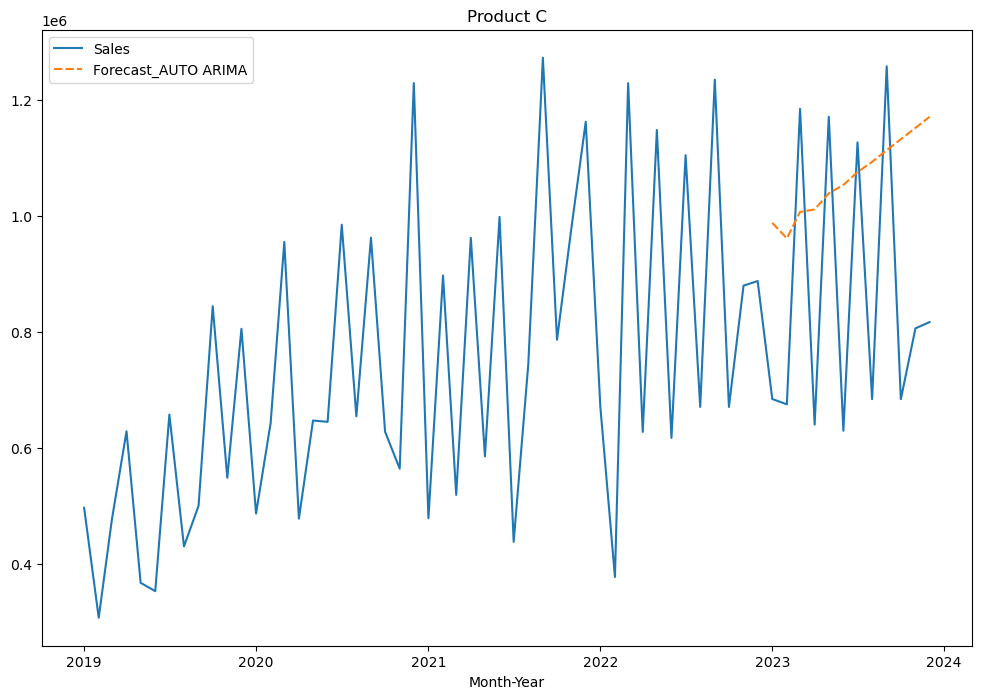

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product C')

In [24]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 287776.2171141219
MAPE - AUTO ARIMA: 0.3889602560690184
MSE - AUTO ARIMA: 98416798538.3998
RMSE - AUTO ARIMA: 313714.517576729


In [25]:
sales_c.tail(12)

,Sales,Forecast_ARIMA,Forecast_AUTO ARIMA
Month-Year,,,
2023-01-01,684175,848715.982358,9.883763e+05
2023-02-01,675038,863371.822947,9.616829e+05
2023-03-01,1185258,851077.677233,1.007121e+06
2023-04-01,639923,852465.932379,1.011640e+06
2023-05-01,1171761,847099.829431,1.039371e+06
2023-06-01,629400,845253.343037,1.053935e+06
2023-07-01,1127413,841756.625513,1.075969e+06
2023-08-01,683935,839206.352276,1.093765e+06
2023-09-01,1258717,836293.628343,1.113965e+06


In [26]:
sales_c.mean()

Sales                  7.599849e+05
Forecast_ARIMA         8.432007e+05
Forecast_AUTO ARIMA    1.066885e+06
dtype: float64

# SARIMA

In [27]:
import statsmodels.api as sm

In [28]:
sarima=sm.tsa.statespace.SARIMAX(sales_c['Sales'],order=(2, 0, 1),seasonal_order=(2,0,1,12))
sarima_model=sarima.fit()

In [29]:
forecast_test_sarima=sarima_model.predict(start=48,end=59,dynamic=True)

In [30]:
sales_c['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_c[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

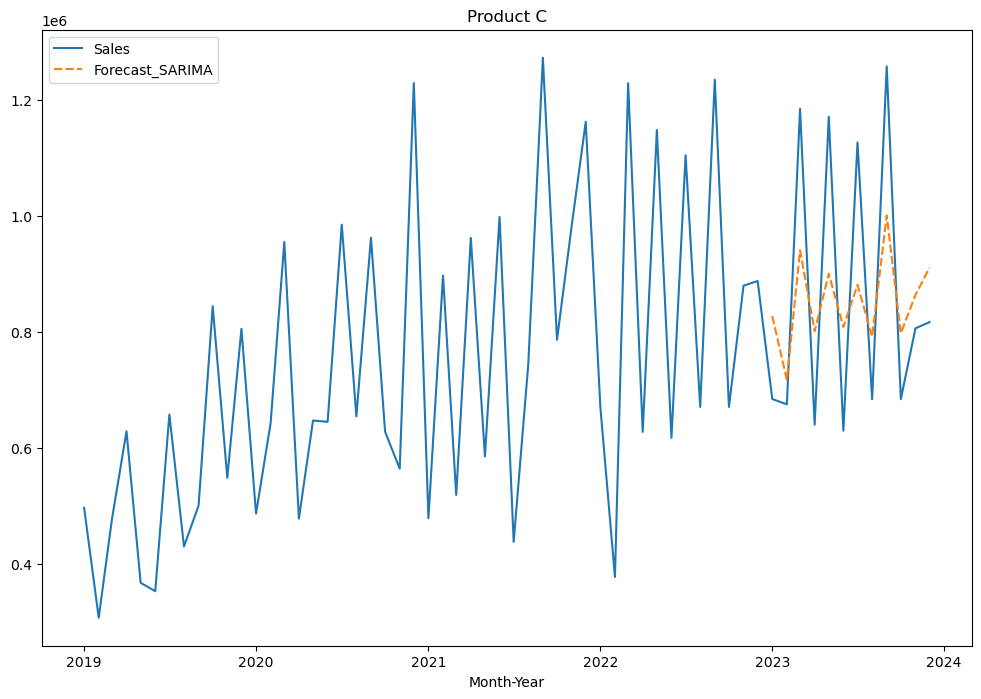

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMA']])
plt.title('Product C')

In [32]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 159908.34
MAPE - SARIMA: 0.182
MSE - SARIMA: 31448323304.352
RMSE - SARIMA: 177336.751


In [34]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,207458.307440,0.236114,5.655925e+10,237821.878775
AUTO ARIMA,287776.217114,0.388960,9.841680e+10,313714.517577
SEASONAL ARIMA,159908.339534,0.181720,3.144832e+10,177336.751138
